In [ ]:
"""
# OpenCV-Python Study documentation!
# https://opencv-python.readthedocs.io/en/latest/index.html
"""
# https://opencv-python-tutroals.readthedocs.io/en/latest/
print(__doc__)

In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from _path import (DIR_SRC, stop_if_none)


# functions : for a few initial path setting



In [4]:
filename_path = './images/chess_board.png'
# filename_path = './images/chess_board_small.png'

winName0 = 'gray'
winName1 = 'canny edges'

In [5]:
def get_RGB(imgBGR):
    return cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

def get_BGR(imgRGB):
    return cv2.cvtColor(imgRGB, cv2.COLOR_RGB2BGR)

In [6]:
# img = cv2.imread(r'images\chessboard\frame01.jpg')
img = cv2.imread(filename_path)
img_original = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

grayRGB = get_RGB(gray)
edgesRGB = get_RGB(edges)

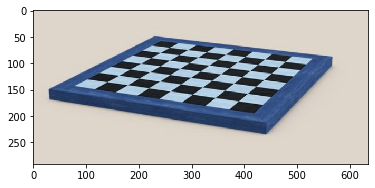

In [7]:
plt.imshow(img_original)

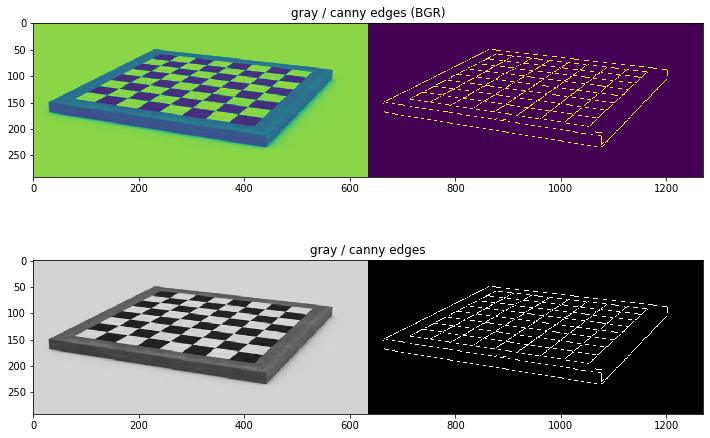

In [8]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].imshow(np.hstack((gray, edges)))
axes[1].imshow(np.hstack((grayRGB, edgesRGB)))

axes[0].set_title(winName0 + ' / ' + winName1 + ' (BGR)')
axes[1].set_title(winName0 + ' / ' + winName1)

plt.show()

In [9]:
grayResized = imutils.resize(gray, width=1000)
edgesResized = imutils.resize(edges, width=1000)

# cv2.imshow(winName0, grayResized)
# cv2.imshow(winName1, edgesResized)

# cv2.waitKey()
# cv2.destroyAllWindows()

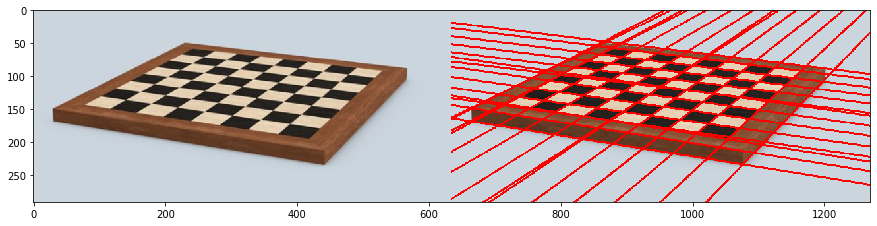

In [10]:
lines = cv2.HoughLines(
        image=edges, 
        rho=1, 
        theta = np.pi/180, 
        # threshold=70,           # FOR SMALL (more lines)
        threshold=110,            # FOR BIG   (less lines)
    )

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        
        x0 = a * rho
        y0 = b * rho
        
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 +  1000*(a))
        
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

result_v = np.vstack((img_original, img))
result_h = np.hstack((img_original, img))

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.imshow(get_RGB(result_h))

In [11]:
# cv2.imshow('img_orig',img_original)
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()